# Polynomial Regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

np.random.rand(200, 1) generates 200 random numbers between 0 and 1. <br>
Multiplying by 6 scales these numbers to a range of 0 to 6. <br>
Subtracting 3 shifts the range to -3 to 3.<br>
Therefore, X contains 200 random values uniformly distributed between -3 and 3.

In [15]:
X = 6 * np.random.rand(200,1) - 3
y = (0.8* X**2) + (0.9* X) +  2 + np.random.rand(200,1) 
# y = 0.8 X**2 + 0.9 X +  2

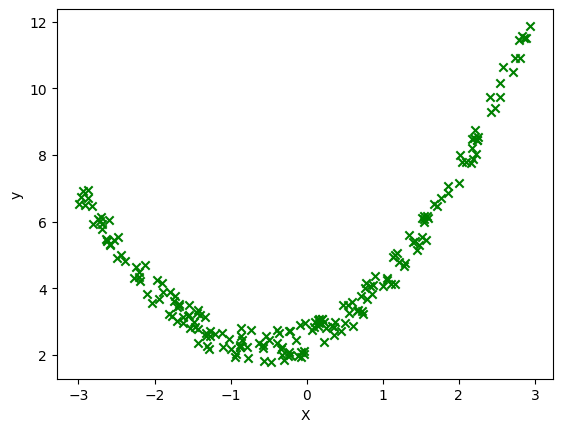

In [16]:
plt.scatter(X,y,marker='x', color='g')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state=42)


### Applying LR

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred_lr = lr.predict(X_test)

In [21]:
r2_score(y_test, y_pred_lr)

0.16826058371929398

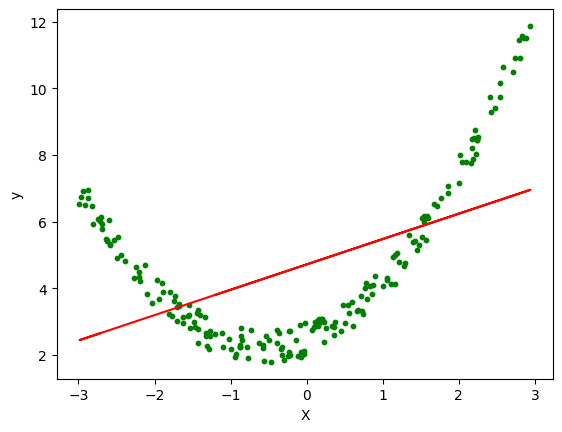

In [27]:
plt.scatter(X,y,marker='o', color='g', s=10) # s -> size of marker
plt.plot(X_train, lr.predict(X_train), color='r')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Applying Polynomial LR

In [40]:
#degree = 2
poly = PolynomialFeatures(degree=2)  # transform x -> x^0 +  x^1 + x^2
# by defalut bias will be true which is intercept 

In [41]:
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [42]:
print("Train")
print(X_train[0])
print(X_train_trans[0])
print("Test")
print(X_test[0])
print(X_test_trans[0])

Train
[-1.19973341]
[ 1.         -1.19973341  1.43936024]
Test
[-2.03352021]
[ 1.         -2.03352021  4.13520442]


In [43]:
lr = LinearRegression()

In [44]:
lr.fit(X_train_trans, y_train)


LinearRegression()

In [46]:
y_pred_p = lr.predict(X_test_trans)

In [47]:
r2_score(y_test, y_pred_p)

0.9812614825960989

In [48]:
lr.coef_

array([[0.        , 0.89223773, 0.79733858]])

In [49]:
lr.intercept_

array([2.52195417])

In [60]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)


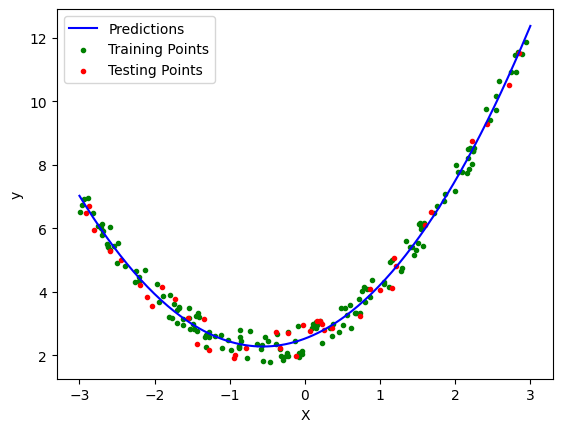

In [61]:
#  X_new and y_new are your new prediction points
plt.plot(X_new, y_new, label='Predictions', color='blue')

# Scatter plot for training points
plt.scatter(X_train, y_train, marker='.', color='g', label="Training Points")

# Scatter plot for testing points
plt.scatter(X_test, y_test, color='r', marker='.', label='Testing Points')

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


## Multiple Polynomial LR

In [63]:
x = np.random.rand(100,1) - 2.8
y = np.random.rand(100,1) - 2.8

z = x**2 +  y**2 + 0.2* x + 0.2 * y + 0.1*x*y + np.random.randn(100,1)   #for creating polynomial 


In [64]:
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [ ]:
df = px.data.iris()
fig = px.scatter_3d(df, x = x.ravel(), y = y.ravel(), z=z.ravel())
fig.show()